# K-means演算法

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_org = pd.read_csv('content/customer.csv')
df_org

,性別,年齡,收入(千),消費指數(1-100)
0,男,34,78,1
1,男,20,61,49
2,男,29,28,82
3,女,31,81,93
4,男,48,60,49
...,...,...,...,...
195,女,33,86,95
196,男,35,28,61
197,女,68,48,48
198,男,38,71,75


Bad pipe message: %s [b"\x9f`\x94\x06\x1bkr\xc6\xc3\x89\xfeQE\\\x80\x18\x17\xa8\x00\x00|\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\xcc\xa8\xcc\xaa\xc0\xaf\xc0\xad\xc0\xa3\xc0\x9f\xc0]\xc0a\xc0W\xc0S\xc0+\xc0/\x00\xa2\x00\x9e\xc0\xae\xc0\xac\xc0\xa2\xc0\x9e\xc0\\\xc0`\xc0V\xc0R\xc0$\xc0(\x00k\x00j\xc0#\xc0'\x00g\x00@\xc0\n\xc0\x14\x009\x008\xc0\t\xc0\x13\x003\x002"]
Bad pipe message: %s [b"\xc7#Z\x83ZC\x0c\xec\x82%,\xb3\x17%&\xaf\r\xff\x00\x00\xa6\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\xcc\xa8\xcc\xaa\xc0\xaf\xc0\xad\xc0\xa3\xc0\x9f\xc0]\xc0a\xc0W\xc0S\xc0+\xc0/\x00\xa2\x00\x9e\xc0\xae\xc0\xac\xc0\xa2\xc0\x9e\xc0\\\xc0`\xc0V\xc0R\xc0$\xc0(\x00k\x00j\xc0s\xc0w\x00\xc4\x00\xc3\xc0#\xc0'\x00g\x00@\xc0r\xc0v\x00\xbe\x00\xbd\xc0\n\xc0\x14\x009\x008\x00\x88\x00\x87\xc0\t\xc0\x13\x003\x002\x00\x9a\x00\x99\x00E\x00D\xc0\x07\xc0\x11\xc0\x08\xc0\x12\x00\x16\x00\x13\x00\x9d\xc0\xa1\xc0\x9d\xc0Q\x00\x9c\xc0\xa0\xc0\x9c\xc0P\x00=\x00\xc0\x00<\x00\xba\x005\x00\x84\x00/\x00\x96\x00A\x00\x05\x00\n\x00\xff\x01\x00\x

In [3]:
# 自訂 Encoder ，'男':1, '女':2
#
dict1 = {'男':1, '女':2}
df_ok = df_org
df_ok['性別'].replace(dict1, inplace=True)
df_ok

,性別,年齡,收入(千),消費指數(1-100)
0,1,34,78,1
1,1,20,61,49
2,1,29,28,82
3,2,31,81,93
4,1,48,60,49
...,...,...,...,...
195,2,33,86,95
196,1,35,28,61
197,2,68,48,48
198,1,38,71,75


In [4]:
# 使用 Label Encoder， '男':1, '女':0
#
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df_ok = df_org
df_ok['性別'] = labelencoder.fit_transform(df_org['性別'])
df_ok

,性別,年齡,收入(千),消費指數(1-100)
0,0,34,78,1
1,0,20,61,49
2,0,29,28,82
3,1,31,81,93
4,0,48,60,49
...,...,...,...,...
195,1,33,86,95
196,0,35,28,61
197,1,68,48,48
198,0,38,71,75


## 針對 ['年齡'], ['收入(千)'] 來做 k-means   
conclusion:   
['年齡 小 (30, 40)',      '收入(千) (>80k)']  
['年齡 小 (30, 40) 以外', '收入(千) (<80k)']

In [5]:
df = df_ok[['年齡','收入(千)']].iloc[0:25]
df

,年齡,收入(千)
0,34,78
1,20,61
2,29,28
3,31,81
4,48,60
5,42,34
6,26,54
7,43,78
8,48,39
9,32,103


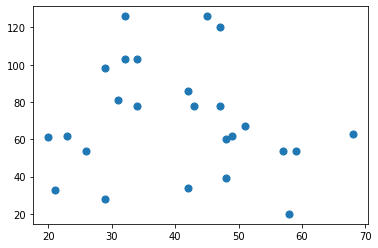

In [6]:
import matplotlib.pyplot as plt
X=np.array(df)
plt.scatter(X[:,0],X[:,1],s=50)

In [7]:
from sklearn.cluster import KMeans
# K Means model  (無監督 學習)

km = KMeans(n_clusters=3)
km.fit(df)


KMeans(n_clusters=3)

In [8]:
km.labels_

array([2, 1, 1, 2, 2, 1, 1, 2, 1, 0, 0, 1, 2, 1, 2, 2, 2, 1, 2, 2, 0, 0,
       0, 2, 0])

In [9]:
# 加入分群結果 # 加上類別

df['類別'] = km.labels_
df

,年齡,收入(千),類別
0,34,78,2
1,20,61,1
2,29,28,1
3,31,81,2
4,48,60,2
5,42,34,1
6,26,54,1
7,43,78,2
8,48,39,1
9,32,103,0


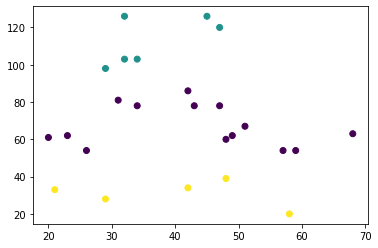

In [10]:
plt.scatter(X[:,0],X[:,1], c=km.labels_)

In [45]:
# 解讀各群組資料
df1 = df[df['類別']==0]
df1.iloc[:25, :]

,年齡,收入(千),類別
0,34,78,0
1,20,61,0
3,31,81,0
4,48,60,0
7,43,78,0
12,59,54,0
13,23,62,0
14,47,78,0
15,68,63,0
16,57,54,0


In [11]:
# 解讀各群組資料
df1 = df[df['類別']==1]
df1.iloc[:25, :]

,年齡,收入(千),類別
9,32,103,1
10,29,98,1
20,45,126,1
21,32,126,1
22,47,120,1
24,34,103,1


In [12]:
# 解讀各群組資料
df1 = df[df['類別']==2]
df1.iloc[:25, :]

,年齡,收入(千),類別
2,29,28,2
5,42,34,2
8,48,39,2
11,21,33,2
17,58,20,2


In [13]:
df_ok.iloc[df1.index]

,性別,年齡,收入(千),消費指數(1-100)
2,0,29,28,82
5,1,42,34,17
8,0,48,39,36
11,1,21,33,81
17,1,58,20,15


## 針對 年齡, 收入(千), 消費指數(1-100)

In [23]:
import pandas as pd
import numpy as np

df_org = pd.read_csv('content/customer.csv')
df_org

df = df_ok[['年齡','收入(千)','消費指數(1-100)']].iloc[:]
df


,年齡,收入(千),消費指數(1-100)
0,34,78,1
1,20,61,49
2,29,28,82
3,31,81,93
4,48,60,49
...,...,...,...
195,33,86,95
196,35,28,61
197,68,48,48
198,38,71,75


In [24]:

from sklearn.cluster import KMeans
# K Means model  (無監督 學習)

km = KMeans(n_clusters=3)
km.fit(df)

km.labels_


array([1, 0, 0, 2, 0, 0, 0, 1, 0, 2, 2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 2,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 2, 2, 0, 0, 1, 0, 2, 0,
       0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 0, 2, 2,
       0, 2, 0, 1, 1, 2, 0, 0, 0, 0, 2, 1, 0, 0, 1, 0, 0, 1, 1, 2, 0, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 1, 2, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 1, 1, 0, 0, 0, 0, 1, 0, 1, 2, 2,
       0, 0, 2, 0, 1, 0, 2, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2,
       0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 1, 0, 2, 1, 0, 2, 0, 0,
       2, 2])

In [25]:
x, y, z = df['年齡'], df['收入(千)'], df['消費指數(1-100)']
x

0      34
1      20
2      29
3      31
4      48
       ..
195    33
196    35
197    68
198    38
199    32
Name: 年齡, Length: 200, dtype: int64

No handles with labels found to put in legend.


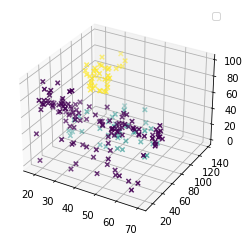

In [27]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(x, y, z, c=km.labels_, marker='o')
ax.legend()
plt.show()